In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

DATA CLEAN

In [82]:
df = pd.read_csv("../dataset/games-features.csv")
if(df.isnull().values.any()):
    df.dropna(inplace=True)#null degerler silindi
df=df.drop(['QueryID',
         'DeveloperCount',
         'PackageCount','SteamSpyOwnersVariance','SteamSpyPlayersEstimate','SteamSpyPlayersVariance',
         'PublisherCount','AchievementHighlightedCount','PriceCurrency','Background',
         'DetailedDescrip','DRMNotice','ExtUserAcctNotice','HeaderImage','LegalNotice'],axis=1)
df = df.drop("QueryName", axis=1)
df = df.rename(columns={"ResponseName": "AppName"})
df = df.drop("ResponseID", axis=1)
df = df.rename(columns={"ResponseID": "AppID"})
df = df.rename(columns={"MovieCount": "GameTrailerCount"})
df = df.rename(columns={"SteamSpyOwners": "UserCount"})
df['Email']=df.SupportEmail==" "
df = df.drop("SupportEmail", axis=1)
df['Websites']=df.Website==" "
df = df.drop("Website", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 13356
Data columns (total 61 columns):
AppName                        13352 non-null object
ReleaseDate                    13352 non-null object
RequiredAge                    13352 non-null int64
DemoCount                      13352 non-null int64
DLCCount                       13352 non-null int64
Metacritic                     13352 non-null int64
GameTrailerCount               13352 non-null int64
RecommendationCount            13352 non-null int64
ScreenshotCount                13352 non-null int64
UserCount                      13352 non-null int64
AchievementCount               13352 non-null int64
ControllerSupport              13352 non-null bool
IsFree                         13352 non-null bool
FreeVerAvail                   13352 non-null bool
PurchaseAvail                  13352 non-null bool
SubscriptionAvail              13352 non-null bool
PlatformWindows                13352 non-null bool
PlatformLin

In [83]:
print("Toplam oyun sayısı : {0}".format(len(df.AppName.unique())))
dfNonZeroMetacritic = df[df.Metacritic != 0]
print("Ortalama metacritix : {0}".format(dfNonZeroMetacritic.Metacritic.mean()))
dfNonPrice = df[df.PriceFinal != 0]
print("Ortalama fiyat $ : {0}".format(dfNonZeroMetacritic.PriceFinal.mean()))

Toplam oyun sayısı : 13195
Ortalama metacritix : 72.16021126760563
Ortalama fiyat $ : 14.016210387323943


DATA2 CLEAN

In [84]:
df200kPlayer= pd.read_csv("../dataset/steam-200k.csv",names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df200kPlayer=df200kPlayer [df200kPlayer .Action != 'purchase']# satın alma verisi silindi
df200kPlayer.info()
df200kPlayer.isnull().values.any()
if(df.isnull().values.any()):
    df.dropna(inplace=True)#null degerler silindi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 1 to 199999
Data columns (total 5 columns):
UserID    70489 non-null int64
Game      70489 non-null object
Action    70489 non-null object
Hours     70489 non-null float64
Other     70489 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.2+ MB


In [85]:
print("Toplam oyun sayısı : {0}".format(len(df200kPlayer.Game.unique())))
print("Toplam kullanıcı sayısı: {0}".format(len(df200kPlayer.UserID.unique())))

Toplam oyun sayısı : 3600
Toplam kullanıcı sayısı: 11350


DATA VISUALIZATION

In [86]:
figsize=(12,8)

In [87]:
Genres_names=['GenreIsAction','GenreIsIndie','GenreIsAdventure',
'GenreIsCasual',
'GenreIsStrategy',
'GenreIsRPG',
'GenreIsSimulation',
'GenreIsEarlyAccess',
'GenreIsFreeToPlay',
'GenreIsRacing',
'GenreIsSports',
'GenreIsMassivelyMultiplayer',
'GenreIsNonGame']

In [88]:
GenreIsAction=df.index[df['GenreIsAction'] == True].tolist()
GenreIsIndie = df.index[df['GenreIsIndie'] == True].tolist()
GenreIsAdventure=df.index[df['GenreIsAdventure'] == True].tolist()
GenreIsCasual=df.index[df['GenreIsCasual'] == True].tolist()
GenreIsStrategy=df.index[df['GenreIsStrategy'] == True].tolist()
GenreIsRPG=df.index[df['GenreIsRPG'] == True].tolist()
GenreIsSimulation=df.index[df['GenreIsSimulation'] == True].tolist()
GenreIsEarlyAccess=df.index[df['GenreIsEarlyAccess'] == True].tolist()
GenreIsFreeToPlay=df.index[df['GenreIsFreeToPlay'] == True].tolist()
GenreIsRacing=df.index[df['GenreIsRacing'] == True].tolist()
GenreIsSports=df.index[df['GenreIsSports'] == True].tolist()
GenreIsMassivelyMultiplayer=df.index[df['GenreIsMassivelyMultiplayer'] == True].tolist()
GenreIsNonGame=df.index[df['GenreIsNonGame'] == True].tolist()

Genres=[GenreIsAction,GenreIsIndie,GenreIsAdventure,
GenreIsCasual,
GenreIsStrategy,
GenreIsRPG,
GenreIsSimulation,
GenreIsEarlyAccess,
GenreIsFreeToPlay,
GenreIsRacing,
GenreIsSports,
GenreIsMassivelyMultiplayer,
GenreIsNonGame]

In [89]:
meta=[]
ort=[]
oyuncu=[]
oyuncu_ort=[]
fiyat_ort=[]
fiyat=[]
for i in range(len(Genres)):
    for j in Genres[i]:
    
        if df['Metacritic'][j] >0 and df['PriceInitial'][j] > 0:
            
            meta.append(df['Metacritic'][j])
            oyuncu.append(df['UserCount'][j])
            fiyat.append((df['PriceInitial'][j]))
    ort.append(np.mean(meta))
    oyuncu_ort.append(np.mean(oyuncu))
    fiyat_ort.append(np.mean(fiyat))

In [90]:
ort_df=pd.DataFrame(list(zip(oyuncu_ort, ort ,fiyat_ort)),
              columns=['oyuncu sayısı','metacritic','fiyat' ], index=Genres_names)

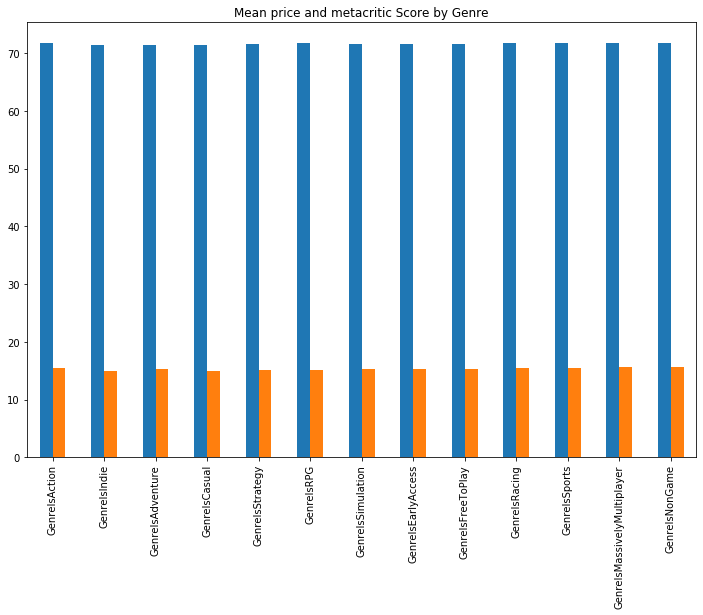

In [91]:
ort_df.drop(['oyuncu sayısı'], axis=1).plot(kind='bar', legend=False, title="Mean price and metacritic Score by Genre",figsize=figsize)

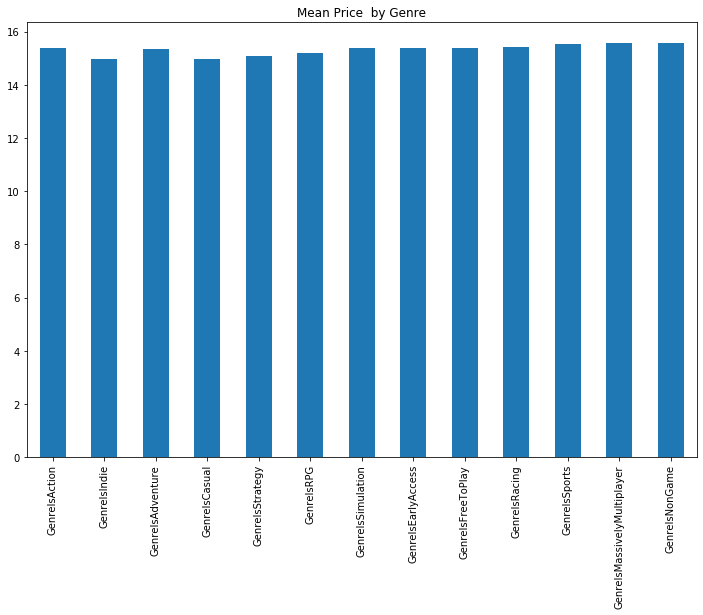

In [92]:
ort_df.drop(['oyuncu sayısı','metacritic'], axis=1).plot(kind='bar', legend=False, title="Mean Price  by Genre",figsize=figsize)

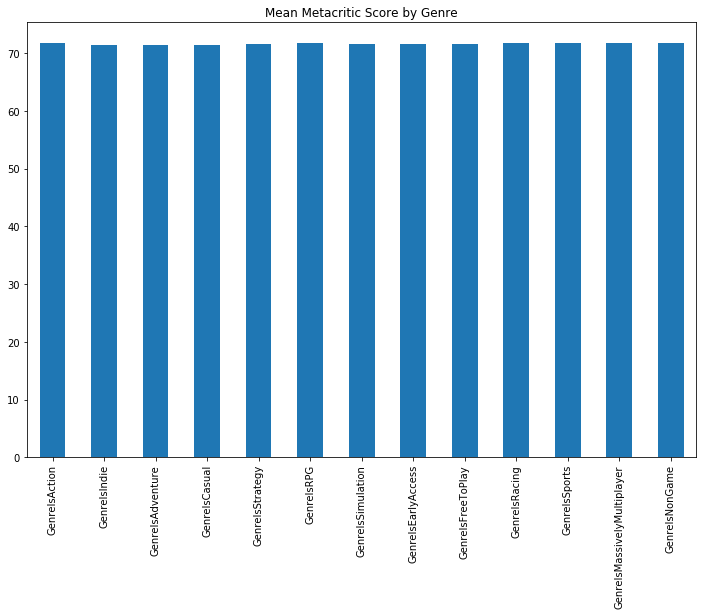

In [93]:
ort_df.drop(['oyuncu sayısı','fiyat'], axis=1).plot(kind='bar', legend=False, title="Mean Metacritic Score by Genre",figsize=figsize)

In [94]:
total_user_game = df200kPlayer.groupby('Game')['UserID'].agg('count').sort_values(ascending=False)[0:20] #oyun ismine göre kaç kullanıcı oldugunu gruplandı
total_user_game

Game
Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Terraria                            460
Portal 2                            453
Warframe                            424
Portal                              417
Robocraft                           407
PAYDAY 2                            390
Borderlands 2                       386
Half-Life 2                         356
Heroes & Generals                   335
War Thunder                         303
Name: UserID, dtype: int64

In [95]:
total_hours = df200kPlayer.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)[0:20]#oynama saatleri
total_hours

Game
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Football Manager 2013                           32308.6
Football Manager 2012                           30845.8
Football Manager 2014                           30574.8
Terraria                                        29951.8
Warframe                                        27074.6
Football Manager 2015                           24283.1
Arma 3                                          24055.7
Grand Theft Auto V                         

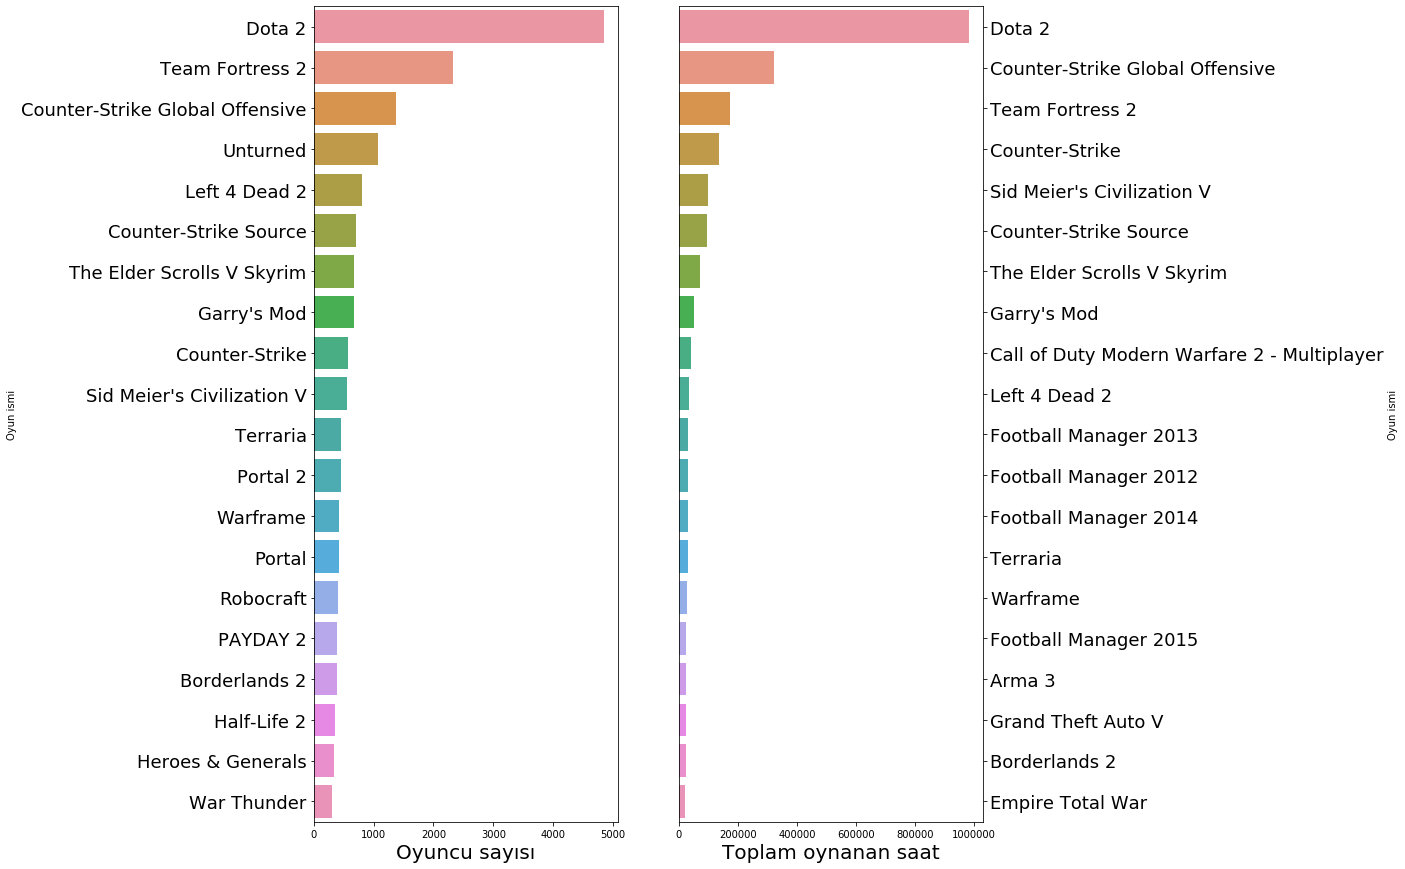

In [96]:
total_user_game = pd.DataFrame({'game': total_user_game.index, 'total user game': total_user_game.values})
total_hours = pd.DataFrame({'game': total_hours.index, 'total time': total_hours.values})
fig, ax =plt.subplots(1,2,figsize=(12,15))
sns.barplot(y = 'game', x = 'total user game', data = total_user_game, ax=ax[0])
sns.barplot(y = 'game', x = 'total time', data = total_hours, ax=ax[1])
ax[0].set(xlabel='Oyuncu sayısı', ylabel='Oyun ismi')
ax[1].set(xlabel='Toplam oynanan saat', ylabel='Oyun ismi')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
for i in range(0,2):
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)

[Text(0, 0.5, 'Oyun ismi')]

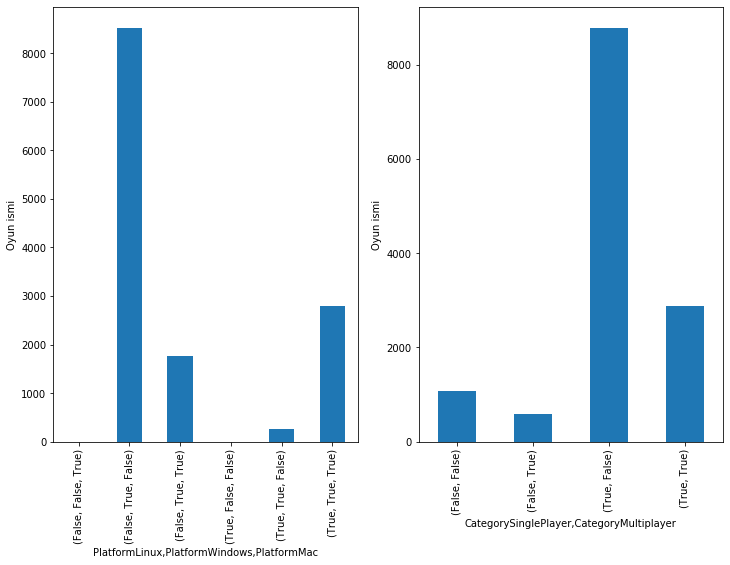

In [97]:
fig, ax =plt.subplots(1,2,figsize=figsize)
df.groupby(['PlatformLinux','PlatformWindows','PlatformMac'])['AppName'].size().plot(kind='bar',ax=ax[0])
df.groupby(['CategorySinglePlayer','CategoryMultiplayer'])['AppName'].size().plot(kind='bar',ax=ax[1])
ax[0].set(ylabel='Oyun ismi')
ax[1].set(ylabel='Oyun ismi')

PREDICT

In [98]:
data = df.copy()
data=data.select_dtypes(exclude=['object'])
data = data[data.Metacritic != 0]
data = data[data.IsFree != True]
y=data["PriceFinal"]
X=data.drop(["PriceFinal","PriceInitial"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report
rf_params={"max_depth":[2,5,8,10,12],
          "max_features":[2,5,8,10,12,15],
          "n_estimators": [10,50,200,500],
          "min_samples_split":[5,10,20,50]}
rf_model=RandomForestRegressor()

rf_cv_model= GridSearchCV(rf_model,
                         rf_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=5)
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10, 12],


In [101]:
print("best params"+str(rf_cv_model.best_params_))

best params{'max_depth': 12, 'max_features': 12, 'min_samples_split': 5, 'n_estimators': 500}


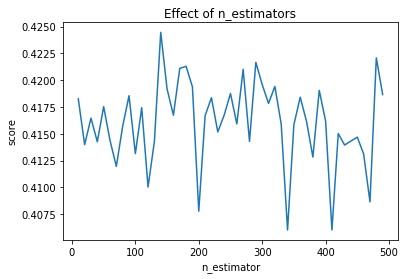

In [107]:
estimators = np.arange(10, 500, 10)
scores = []
rf_tuned=RandomForestRegressor(max_depth=12,
                               max_features=12,
                               min_samples_split=5,
                               n_estimators=500)
for n in estimators:
    rf_tuned.set_params(n_estimators=500)
    rf_tuned.fit(X_train, y_train)
    scores.append(rf_tuned.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [108]:
y_pred_test =rf_tuned.predict(X_test)
y_pred_train =rf_tuned.predict(X_train)
rf_tuned.score(X_test, y_test)

0.4186657933740592

In [109]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred_test)

50.37523668349163

In [110]:
mean_squared_error(y_train,y_pred_train) 

23.058250708350755

In [111]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)[-6:]
indices
#en basariyi tahminler
columns_list=[]
columns_list=df.columns
columns_list[indices]

Index(['DemoCount', 'DLCCount', 'RecommendationCount', 'RequiredAge',
       'ScreenshotCount', 'Metacritic'],
      dtype='object')

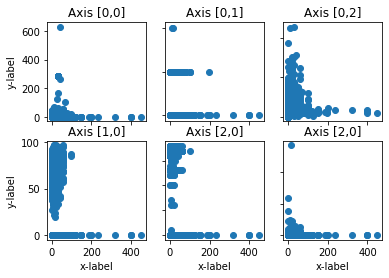

In [112]:
ig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(df.PriceFinal, df.DLCCount)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].scatter(df.PriceFinal, df.DemoCount)
axs[0, 1].set_title('Axis [0,1]')
axs[0, 2].scatter(df.PriceFinal, df.ScreenshotCount)
axs[0, 2].set_title('Axis [0,2]')
axs[1, 0].scatter(df.PriceFinal, df.Metacritic)
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].scatter(df.PriceFinal, df.RequiredAge)
axs[1, 1].set_title('Axis [2,0]')
axs[1, 2].scatter(df.PriceFinal, df.RecommendationCount)
axs[1, 2].set_title('Axis [2,0]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [113]:
for i in range(100):

    print(rf_tuned.predict([X_test.iloc[i]]))
    print(y_test.iloc[i])

[10.44682456]
9.99
[8.99545523]
4.99
[13.99867998]
14.99
[24.39483208]
9.99
[12.21378745]
9.99
[9.92030717]
9.99
[15.54506014]
4.99
[14.0223665]
14.99
[10.10624355]
19.99
[11.2066579]
9.99
[14.59512967]
14.99
[10.18378205]
14.95
[9.34782942]
6.99
[11.35069427]
9.99
[13.53898349]
1.69
[14.73292844]
14.99
[11.86034101]
9.99
[8.97719232]
4.99
[12.14103969]
4.99
[10.93156169]
9.99
[14.28751333]
7.49
[9.64791276]
5.99
[9.84206975]
1.24
[9.56704427]
6.49
[9.15664163]
9.99
[14.10598518]
24.99
[9.18144486]
9.99
[17.49828388]
9.99
[9.47932394]
9.99
[10.2461537]
9.99
[19.47556302]
19.99
[17.65421072]
9.99
[12.56685384]
9.99
[14.84153242]
9.99
[10.66750422]
8.99
[9.38966525]
9.99
[17.95225716]
19.99
[10.19736586]
7.99
[14.32250133]
14.99
[18.52942541]
34.99
[12.16087297]
12.99
[19.46373303]
14.99
[6.20936094]
0.0
[15.78977298]
4.99
[15.34314863]
19.99
[18.34534281]
14.99
[12.29859505]
9.99
[17.1687699]
19.99
[14.99299686]
19.99
[14.21657642]
19.19
[30.82987801]
59.99
[12.45446081]
19.99
[22.08253

In [114]:
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [115]:
fi = rf_feat_importance(rf_tuned, X_train)
fi[:10]

,cols,imp
5,RecommendationCount,0.135873
8,AchievementCount,0.114624
2,DLCCount,0.104226
7,UserCount,0.097045
4,GameTrailerCount,0.097014
3,Metacritic,0.071492
6,ScreenshotCount,0.065194
32,GenreIsIndie,0.043999
18,PCReqsHaveRec,0.034344
25,CategoryCoop,0.018784


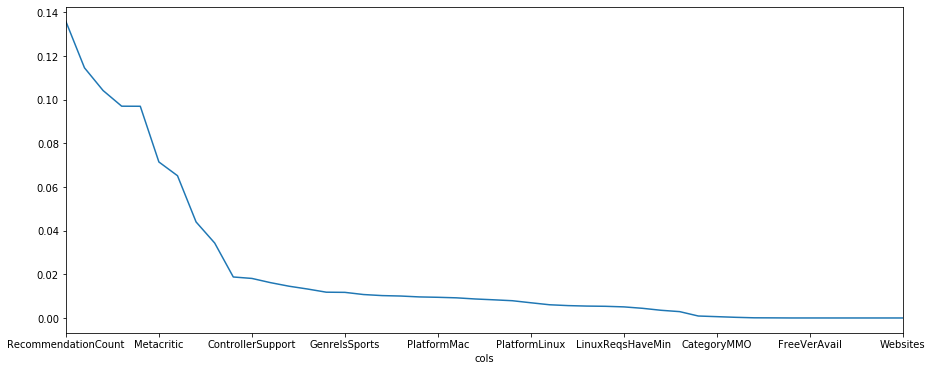

In [116]:
fi.plot('cols', 'imp', figsize=(15,6), legend=False);